In [1]:
pip install numpy pandas matplotlib seaborn scikit-learn


Note: you may need to restart the kernel to use updated packages.


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


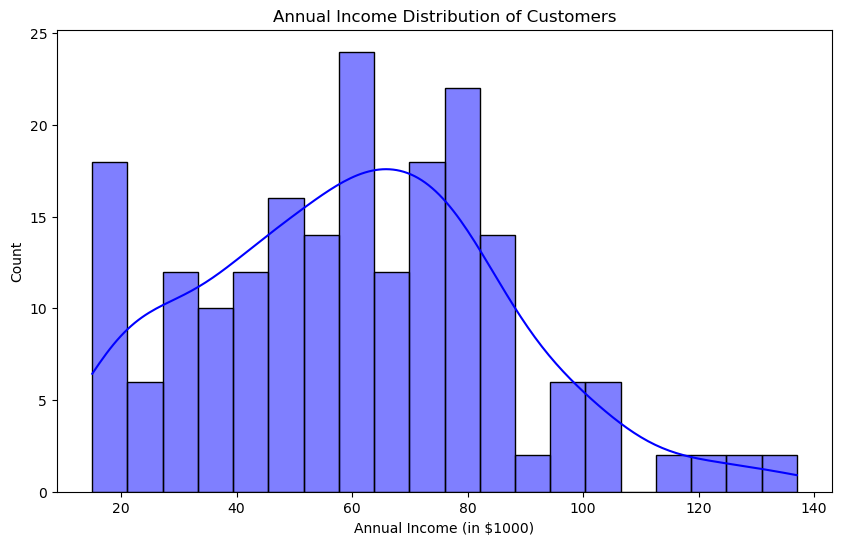

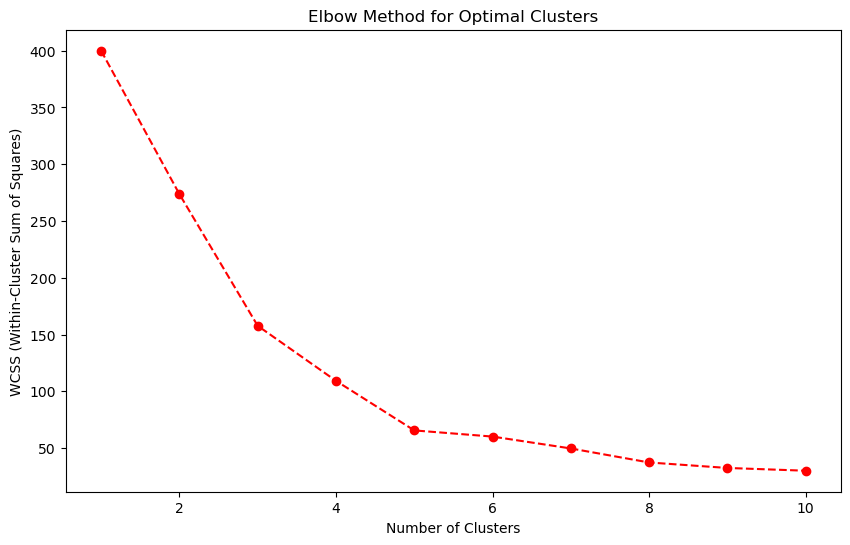

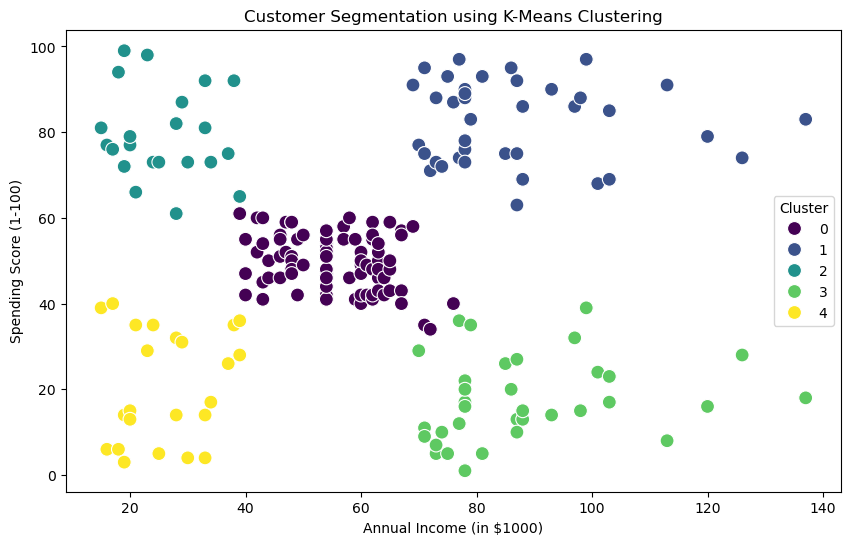

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset (Assuming dataset has columns: 'CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)')
df = pd.read_csv("Mall_Customers.csv")

# Display the first few rows
print(df.head())

# Plot the Annual Income distribution
plt.figure(figsize=(10, 6))
sns.histplot(df["Annual Income (k$)"], bins=20, kde=True, color="blue")
plt.title("Annual Income Distribution of Customers")
plt.xlabel("Annual Income (in $1000)")
plt.ylabel("Count")
plt.show()

# Selecting features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Finding the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='red')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.show()

# Applying K-means with the optimal number of clusters (e.g., 5)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Annual Income (k$)"], y=df["Spending Score (1-100)"], hue=df["Cluster"], palette="viridis", s=100)
plt.title("Customer Segmentation using K-Means Clustering")
plt.xlabel("Annual Income (in $1000)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title="Cluster")
plt.show()
